Initial data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB
None

Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tweet 

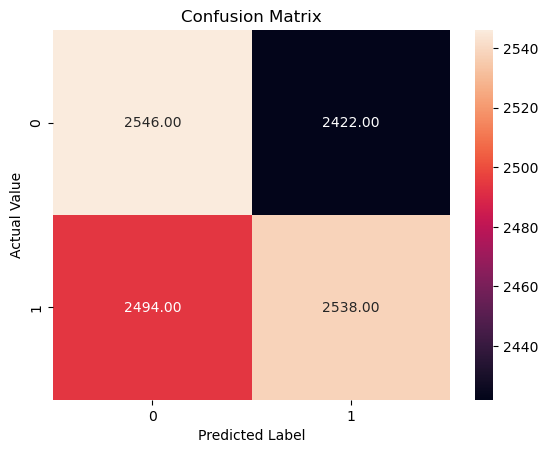

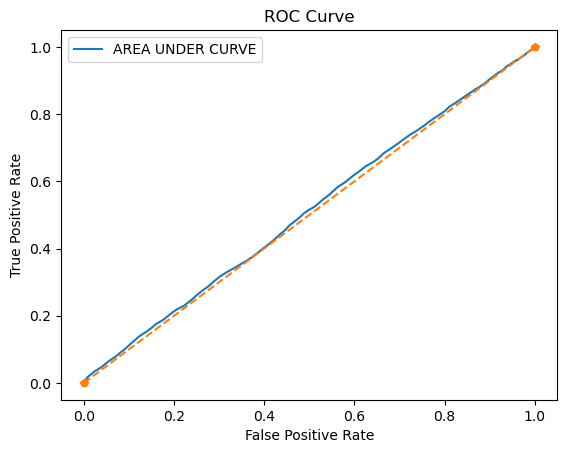

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset
data = pd.read_csv('C:/Users/HP/Downloads/Project datasets-20241106/twitter_bots.csv')

#Start of the data cleaning
print("Initial data information:")
print(data.info())

#Removing the unnesecary columns
data = data.drop(['User ID', 'Username'], axis=1)

#Handling the missing values by Filling or droping them based on feature relevance
data['Location'].fillna('Unknown', inplace=True)
data['Follower Count'].fillna(data['Follower Count'].median(), inplace=True)
data['Retweet Count'].fillna(data['Retweet Count'].median(), inplace=True)
data['Mention Count'].fillna(data['Mention Count'].median(), inplace=True)

#Converting the Verified to binary values (1 for True & 0 for False)
data['Verified'] = data['Verified'].astype(int)

print("\nData after cleaning:")
print(data.info())

#Feature selection and standardization
features = ['Retweet Count', 'Mention Count', 'Follower Count', 'Verified']
X = data[features]
y = data['Bot Label']

#Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("\nThe Features after standardization:")
print(X[:5])

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {len(X_train)}, Test set size: {len(X_test)}")

#Fitting the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("\nModel training complete.")

#Evaluate Model
y_pred = model.predict(X_test)

#Calculating the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

#Confusion Matrix
c_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(c_matrix, annot=True, fmt=".2f")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Value")
plt.show()

#ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
falsepr, truepr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(falsepr, truepr)

plt.plot(falsepr, truepr, label=f"AREA UNDER CURVE")
plt.plot([0, 1], [0, 1], 'p--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
